In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import gridworld
import argparse

algorithm='value_iteration'

def get_alg_module(alg, submodule=None):
    from importlib import import_module
    submodule = submodule or alg
    try:
        # first try to import the alg module from baselines
        alg_module = import_module('.'.join(['models', alg, submodule]))
    except ImportError:
        # then from rl_algs
        alg_module = import_module('.'.join(['rl_' + 'algs', alg, submodule]))

    return alg_module


def get_learn_function(alg):
    return get_alg_module(alg).learn


# Create environment
env = gridworld.GridWorld(hard_version=False)

parser = argparse.ArgumentParser()
parser.add_argument('--alg', help='algorithm to use', default='policy_iteration')
args, unknown = parser.parse_known_args()
args.alg = algorithm

print(args.alg)

# Create environment
env = gridworld.GridWorld(hard_version=False)

learn = get_learn_function(args.alg)
model = learn(env,1000)

# Initialize simulation
s = env.reset()

# Create log to store data from simulation
log = {
    't': [0],
    's': [s],
    'a': [],
    'r': [],
}

# Simulate until episode is done
done = False
while not done:
    a = model.get_policy(s)
    (s, r, done) = env.step(a)
    log['t'].append(log['t'][-1] + 1)
    log['s'].append(s)
    log['a'].append(a)
    log['r'].append(r)

    model.get_log().add('trajectory', env.get_pos(s), 'trajectory', color='red', alpha=0.5)

value_iteration
delta: 10.172066795340385
Policy:
[[0 0 2 0 2]
 [3 1 1 2 2]
 [0 1 1 1 1]
 [3 1 1 1 1]
 [1 1 1 1 1]]
Values:
[[ 0.39579887 10.58869719 10.05926233  5.02180018  4.77071017]
 [ 0.69606028 10.05926233  9.55629921  9.07848425  8.62456004]
 [ 0.6796364   9.55629921  9.07848425  8.62456004  8.19333204]
 [ 0.80501995  9.07848425  8.62456004  8.19333204  7.78366543]
 [ 0.76476895  8.62456004  8.19333204  7.78366543  7.39448216]]
delta: 9.663463455573364
Policy:
[[0 0 2 0 2]
 [0 1 1 2 2]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]]
Values:
[[10.05926233 18.19333204 17.28366543 13.19333204 12.53366543]
 [ 9.55629921 17.28366543 16.41948216 15.59850805 14.81858265]
 [ 9.07848425 16.41948216 15.59850805 14.81858265 14.07765352]
 [ 8.62456004 15.59850805 14.81858265 14.07765352 13.37377084]
 [ 8.19333204 14.81858265 14.07765352 13.37377084 12.7050823 ]]
delta: 7.224403106675444
Policy:
[[0 0 2 0 2]
 [0 1 1 2 2]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]]
Values:
[[17.28366543 24.07765352 22.8

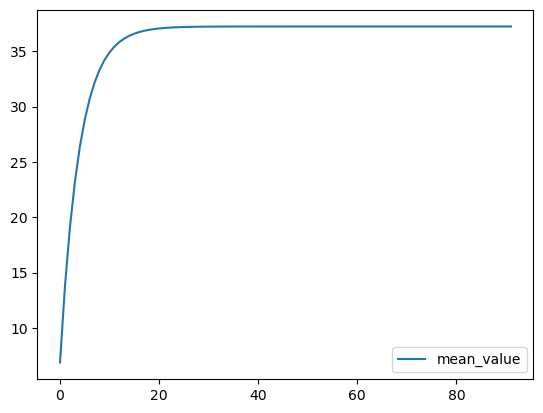

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


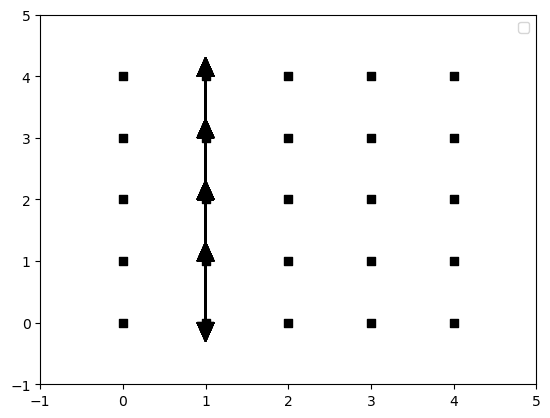

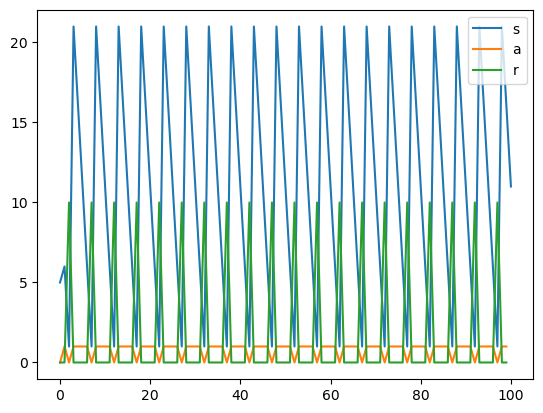

In [4]:
model.get_log().plot(save=True)

# Plot data and save to png file
plt.plot(log['t'], log['s'])
plt.plot(log['t'][:-1], log['a'])
plt.plot(log['t'][:-1], log['r'])
plt.legend(['s', 'a', 'r'])
plt.savefig('figures/gridworld/test_gridworld.png')
plt.show()